<a href="https://colab.research.google.com/github/jthauany/EDA-AgriculturalRawMaterial/blob/main/EDA-AgriculturalRawMaterial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise dos Preços de Matérias-Primas Agrícolas**

Análise de um conjunto de dados que contém preços e variação percentual de preços de algumas matérias-primas agrícolas entre 1990 e 2020.
---
Os objetivos do projeto são **(1)** Verificar a variação dos preços ao longo dos anos, **(2)** Verificar se há correlação entre as variações de preço de cada material, **(3)** Determinar qual material teve a maior e a menor variação de preço total aos longo dos anos e **(4)** talvez fazer predições.

---


Dados fornecidos por Indexmundi.\
[Link do kaggle](https://www.kaggle.com/datasets/kianwee/agricultural-raw-material-prices-19902020/data)







In [2]:
#importando bibliotecas necessárias
import numpy as np #para manipulações algébricas
import pandas as pd #para manipulações e análise dos dados

#para análise exploratória
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')


In [3]:
#Importando o arquivo
df = pd.read_csv('/content/drive/MyDrive/FilesColab/agricultural_raw_material.csv')

**Explorando o dataset**

In [4]:
#visualizando o dataframe
df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,...,500.37,-0.22%,1.66,7.79%,NaN,NaN,NaN,NaN,875.00,0.00%
357,Jan-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,...,499.64,-0.15%,1.68,1.20%,NaN,NaN,NaN,NaN,875.00,0.00%
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,...,496.28,-0.67%,1.61,-4.17%,NaN,NaN,NaN,NaN,875.00,0.00%
359,Mar-20,NaN,NaN,NaN,NaN,1.49,-11.83%,NaN,NaN,276.93,...,507.96,2.35%,1.50,-6.83%,NaN,NaN,NaN,NaN,875.00,0.00%


In [5]:
#exibindo infos sobre o dataset, tamanho da tabela, tipos dos dados, e número de dados não nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

Aqui ele mostra que boa parte da coluna está como objeto, entretanto estas colunas contém dados de preço que devem ser do tipo float. Na limpeza e preparação dos dados isto deve ser modificado.

In [6]:
#visualizando os dados para identificar procedimentos de limpeza e preparação dos dados
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


Ao olhar como os dados são exibidos na tabela nota-se que todos os dados nas colunas de porcentagem do preço possuem o símbolo de %. Além disso, onde não há dados há um "-" e isso pode causar problemas durante a análise. \\
Aqui há duas opções: (**1)** Substituir estes valores pela média dos outros anos, ou **(2)** Retirar estas linhas da análise.
Optamos por retirar estes dados, pois substituí-los pela média pode impactar na interpretação da tendência dos dados históricos.

In [7]:
#verificando quantos dados não nulos em cada coluna
print(df.isnull().sum())

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64


Uma informação importante para se destacar aqui é que os dados nulos são correspondentes aos últimos 34 meses. Sendo assim esta análise será realizada apenas considerando os dados até junho de 2017, pois é a data máxima com informações completas.

**Limpeza e preparação dos dados** \\
Lidar com dados ausentes, incorretos e inválidos. Tranformar alguns dados em formato adequado para a análise.


In [8]:
df=df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '')
df = df.replace('', np.nan)
df['Month'] = df['Month'].replace('-', '', regex=True)

#Retirando todas as linhas com valores NaN
df = df.dropna()

#Checando se todos os NaN foram retirados
df.isnull().sum()


,0
Month,0
Coarse wool Price,0
Coarse wool price % Change,0
Copra Price,0
Copra price % Change,0
Cotton Price,0
Cotton price % Change,0
Fine wool Price,0
Fine wool price % Change,0
Hard log Price,0


In [9]:
#fazendo uma lista com os nomes das colunas para transformar em float
#fiz isso pra não precisar copiar o nome das 25 colunas
nomes_colunas = df.columns.tolist()
df[nomes_colunas[1:25]]
df[nomes_colunas[1:25]] = df[nomes_colunas[1:25]].astype("float")
df.dtypes

,0
Month,object
Coarse wool Price,float64
Coarse wool price % Change,float64
Copra Price,float64
Copra price % Change,float64
Cotton Price,float64
Cotton price % Change,float64
Fine wool Price,float64
Fine wool price % Change,float64
Hard log Price,float64


**Análise exploratória e visualização dos dados**

In [10]:
#transformando a coluna Month no formato de data ano-mes-dia
df['Month']  = pd.to_datetime(df['Month'].str.upper(), format='%b%y', yearfirst=False)
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,1990-05-01,447.26,-7.27,234.0,-0.85,1.89,3.28,1057.18,-1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,-2.63,842.51,1.59
2,1990-06-01,440.99,-1.40,216.0,-7.69,1.99,5.29,898.24,-15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,-6.10,831.35,-1.32
3,1990-07-01,418.44,-5.11,205.0,-5.09,2.01,1.01,895.83,-0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,-4.03,210.05,5.03,798.83,-3.91
4,1990-08-01,418.44,0.00,198.0,-3.41,1.79,-10.95,951.22,6.18,186.13,...,364.60,-3.67,0.88,2.33,129.70,4.40,208.30,-0.83,818.74,2.49
5,1990-09-01,412.18,-1.50,196.0,-1.01,1.79,0.00,936.77,-1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,-4.18,811.62,-0.87


In [11]:
#Criando listas para poder manipular separadamente os preços e as variações %
raw_price=[]
raw_percentage=[]
for i in nomes_colunas:
  if i.endswith("Price"):
    raw_price.append(i)
  elif i.endswith("hange"):
    raw_percentage.append(i)
  else:
    print("Coluna não adicionada as listas: {}".format(i)) #apenas para verificar se estava executando correto


Coluna não adicionada as listas: Month


 **Análise variação temporal de preço**

In [12]:
#Configurações para os plots
colors=['#b84949', '#ff6f00', '#ffbb00', '#9dff00', '#329906', '#439c55', '#67c79e', '#00a1db', '#002254', '#5313c2', '#c40fdb', '#e354aa']
mat_colors=dict(zip(raw_price,colors)) #dicionário que conecta cada material a uma cor


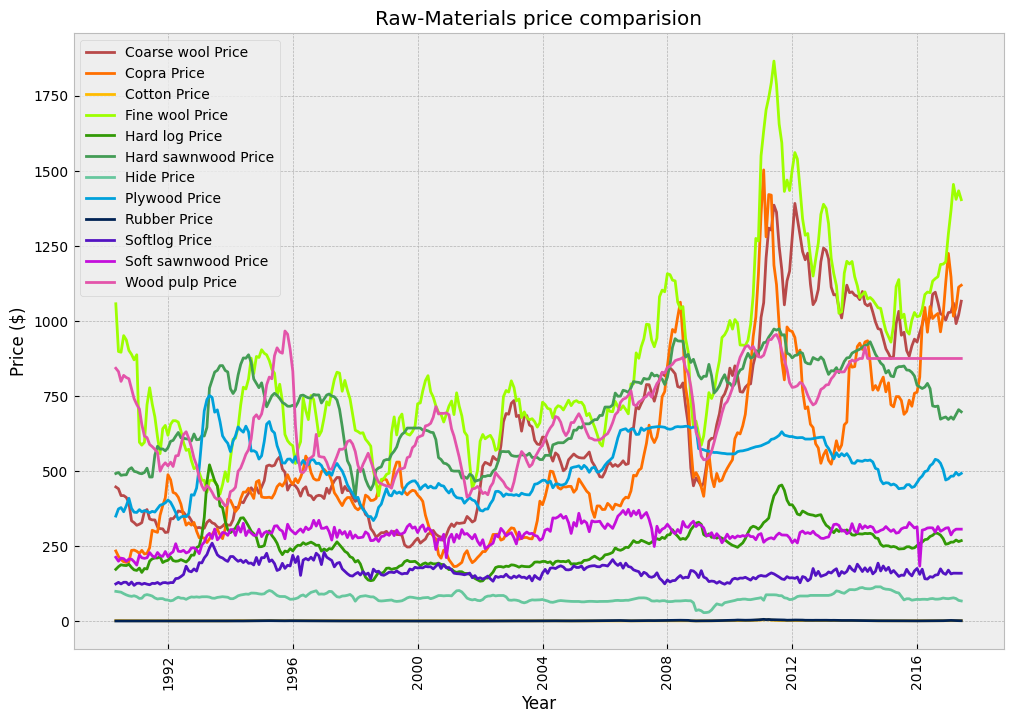

In [13]:
#plot variação temporal de preço
plt.figure(figsize=(12,8))

for i in range(len(raw_price)):
  plt.plot(df['Month'],df[raw_price[i]], color=mat_colors[raw_price[i]], label= raw_price[i])
  plt.xticks(rotation=90)

plt.title("Raw-Materials price comparision")
plt.legend(loc= 'best')
plt.ylabel("Price ($)")
plt.xlabel("Year")
plt.show()


Devido a grande diferença na escala de preços, a visualização da variação temporal dos preços para matérias primas de menor valor ficam prejudicadas.
Por isso, iremos fazer o plot da variação temporal com os preços normalizados para uma melhor visualização do comportamento dos preços ao longo dos anos.

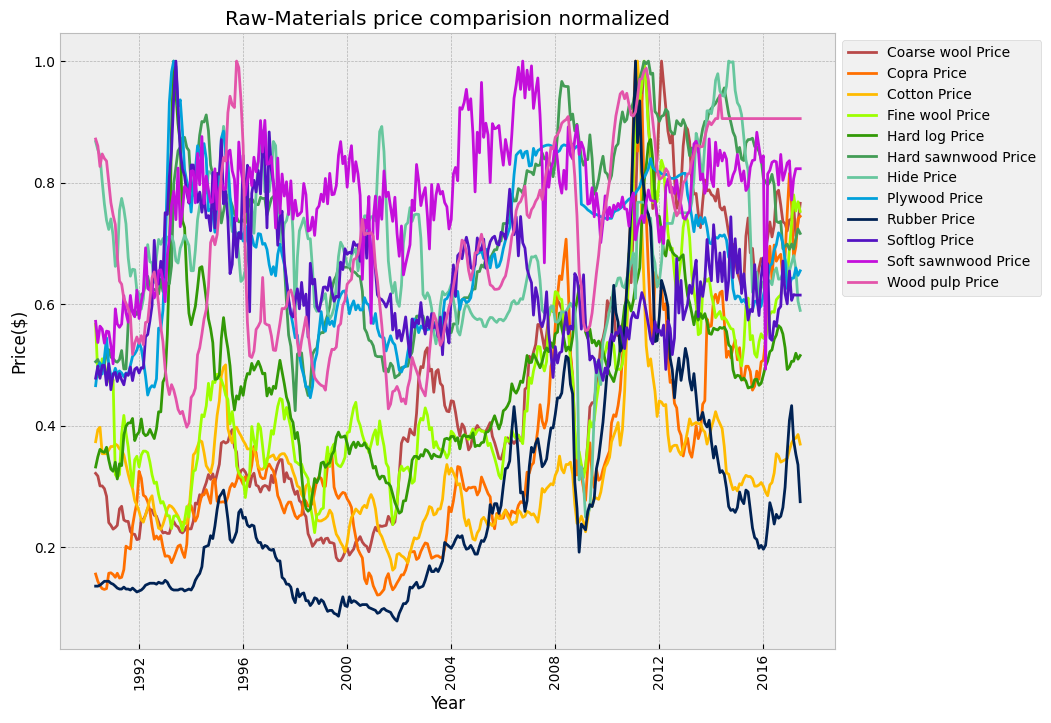

In [14]:
#plot variação temporal de preço
plt.figure(figsize=(10,8))

for i in range(len(raw_price)):
  plt.plot(df['Month'],(df[raw_price[i]])/(max(df[raw_price[i]])), color=colors[i], label= raw_price[i])
  plt.xticks(rotation=90)

plt.title("Raw-Materials price comparision normalized")
plt.legend(loc= 'best', bbox_to_anchor=(1,1))
plt.ylabel("Price($)")
plt.xlabel("Year")
plt.show()


Com os preços normalizados é possível comparar melhor a tendência de subida e queda dos preços de cada matéria prima. \\
* Observamos que o comportamento dos materiais com preços mais baixos seguem uma tendência parecida, tanto de subida quanto de queda.
* Algo que também chama a atenção é a queda brusca dos preços de todos as matérias-primas entre 2008 e 2010, e após isto um aumento acentuado entre 2010 e 2012. Estes comportamentos podem ser explicados pelo impacto causado devido a crise financeira de 2008, que causou uma queda nos preços de inúmeros commodities agrícolas.


**Uma outra forma de visualizar a variação temporal é plotando todos os gráficos em uma mesma imagem, mas de forma separada. É útil também para comparação.**

Text(0.5, 0.98, 'Raw-Materials price comparision')

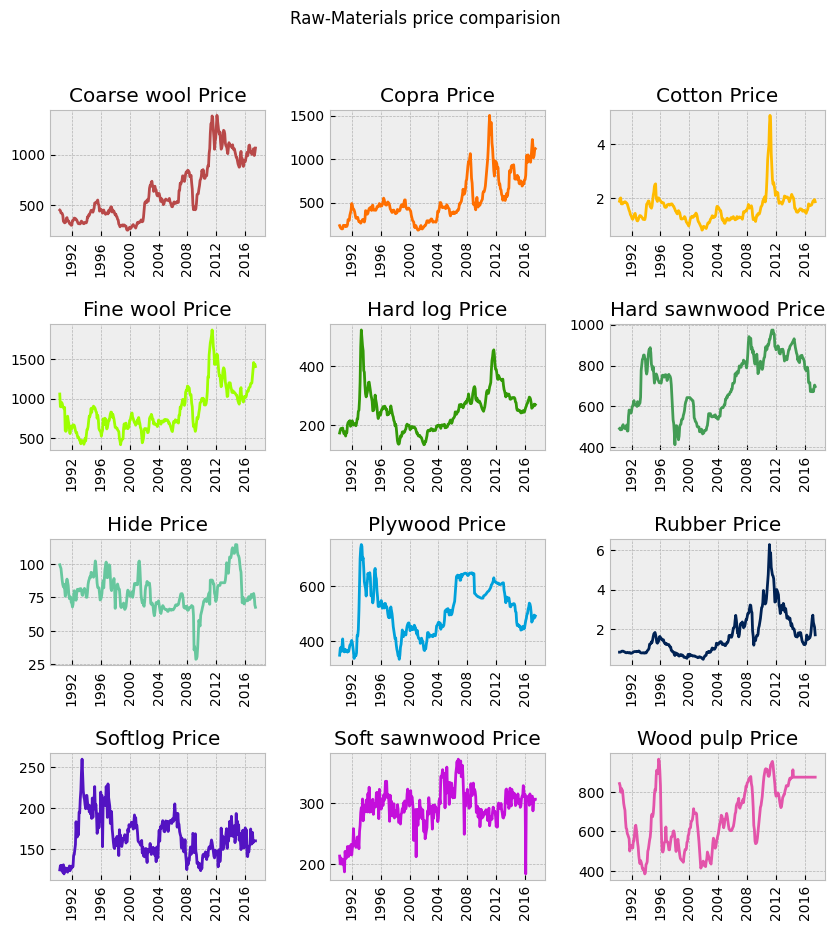

In [15]:
#análise da variação temporal
plt.figure(figsize=(10,10))

for i in range(len(raw_price)):
  plt.subplot(4,3, i+1)
  plt.subplots_adjust( hspace=0.7 ,wspace=0.3)
  plt.title(raw_price[i])
  plt.plot(df['Month'],df[raw_price[i]], color=mat_colors[raw_price[i]])
  plt.xticks(rotation=90)
  #plt.ylabel("Price ($)")
plt.suptitle("Raw-Materials price comparision")


Analisando este gráfico observamos que é possível separá-las em três categorias: **(1)** Baixissímo Preço, **(2)** Baixo Preço e **(3)** Alto preço, dessa forma podemos analisar separadamente o comportamento destes grupos.

In [16]:
# Separando as materias-primas em 3 categorias de acordo com a media de preço

#criando listas de cada categoria para adicionar as materias-primas
super_lowlist=[]
lowlist=[]
highlist=[]

for i in range(len(raw_price)):
  if df[raw_price[i]].mean() < 10: #materias abaixo de 10
    super_lowlist.append(raw_price[i])
  elif 10 < df[raw_price[i]].mean() < 300: #materias entre 10 e 300
    lowlist.append(raw_price[i])
  elif df[raw_price[i]].mean() >= 300: #materias acima de 300
    highlist.append(raw_price[i])
  else:
    print("ERRO: '{}' Não se encaixa em nenhuma das categorias.".format(raw_price[i]))



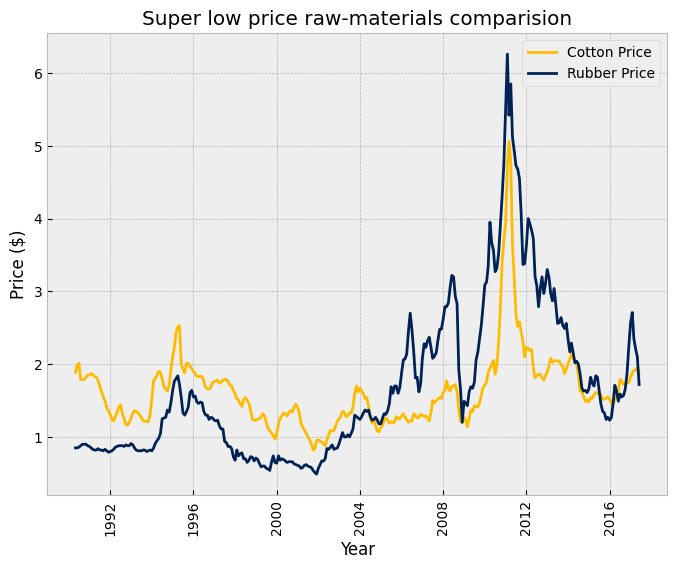

In [17]:
#plot baixissimos preços
plt.figure(figsize=(8,6))

for i in range(len(super_lowlist)):
  plt.plot(df['Month'],df[super_lowlist[i]], color=mat_colors.get(super_lowlist[i]), label= super_lowlist[i])
  plt.xticks(rotation=90)

plt.title("Super low price raw-materials comparision")
plt.legend(loc= 'best')
plt.ylabel("Price ($)")
plt.xlabel("Year")
plt.show()

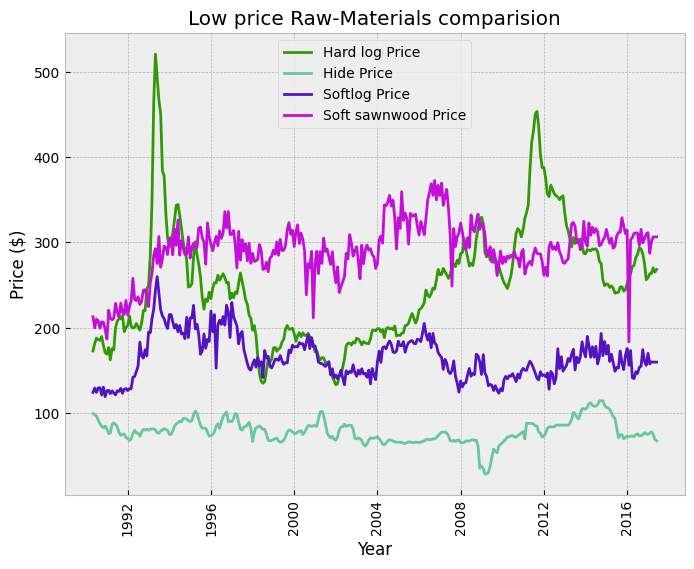

In [18]:
#plot baixos preços
plt.figure(figsize=(8,6))

for i in range(len(lowlist)):
  plt.plot(df['Month'],df[lowlist[i]], color=mat_colors.get(lowlist[i]), label= lowlist[i])
  plt.xticks(rotation=90)

plt.title("Low price Raw-Materials comparision")
plt.legend(loc= 'best')
plt.ylabel("Price ($)")
plt.xlabel("Year")
plt.show()

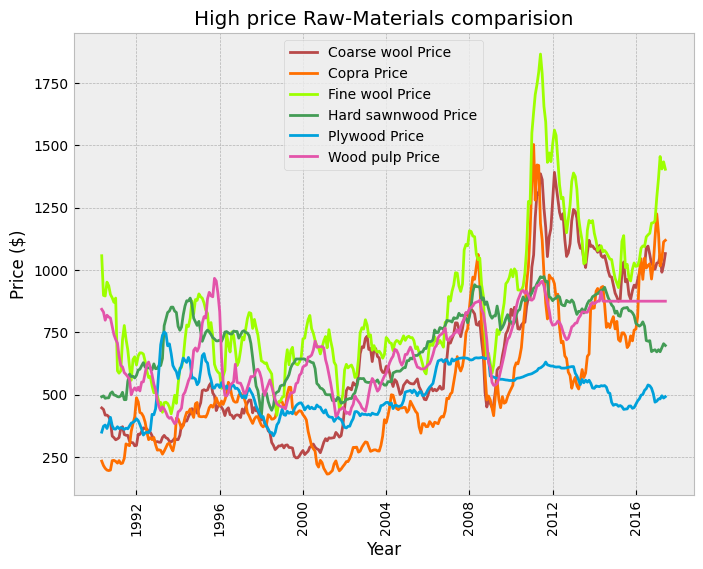

In [19]:
#plot preços altos
plt.figure(figsize=(8,6))

for i in range(len(highlist)):
  plt.plot(df['Month'],df[highlist[i]], color=mat_colors.get(highlist[i]), label=highlist[i])
  plt.xticks(rotation=90)

plt.title("High price Raw-Materials comparision")
plt.legend(loc= 'upper center')
plt.ylabel("Price ($)")
plt.xlabel("Year")
plt.show()

Analisando a variação temporal dos três grupos é possível observar que os matériais de baixissímo e baixo preços seguem uma tendência muito parecida em relação ao aumento e queda de preços.

##**Análise de tendência de preços**

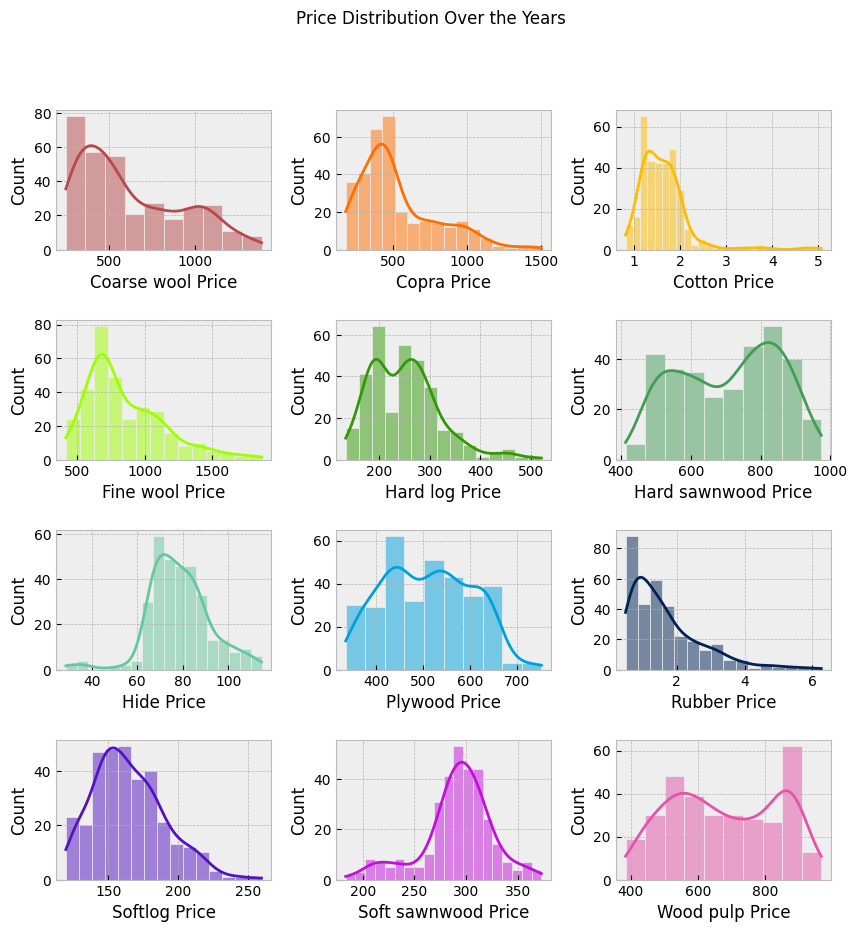

In [20]:
fig,axes= plt.subplots(4,3,figsize=(10,10))

for i in range(len(raw_price)):
  axes=axes.ravel() # Achata o array para iterar sobre cada eixo
  med_raw= df[raw_price[i]].mean()
  plt.subplots_adjust(hspace=0.5 ,wspace=0.3)
  sns.histplot(df[raw_price[i]], kde=True, ax=axes[i], color=colors[i])
  #axes[i].axvline(med_raw,0,lw=1,ls='--',c='black',label= 'Mean Price')
  #axes[i].axvline(df[raw_price[i]].median(),0,lw=1,ls='--',c='red',label= 'Mean Price')


fig.suptitle("Price Distribution Over the Years")
plt.show()


Observando as distribuições dos preços ao longo dos anos podemos ver quais matérias-primas possuem maior variação nos preços ao longo dos anos, como a polpa de madeira e a maderia dura serrada que têm picos de preço em ~$500,00 e ~900,00.

##Variação Percentual de preços ao longo dos anos

Text(0.5, 0.98, 'Price Percentage Change Over the Years')

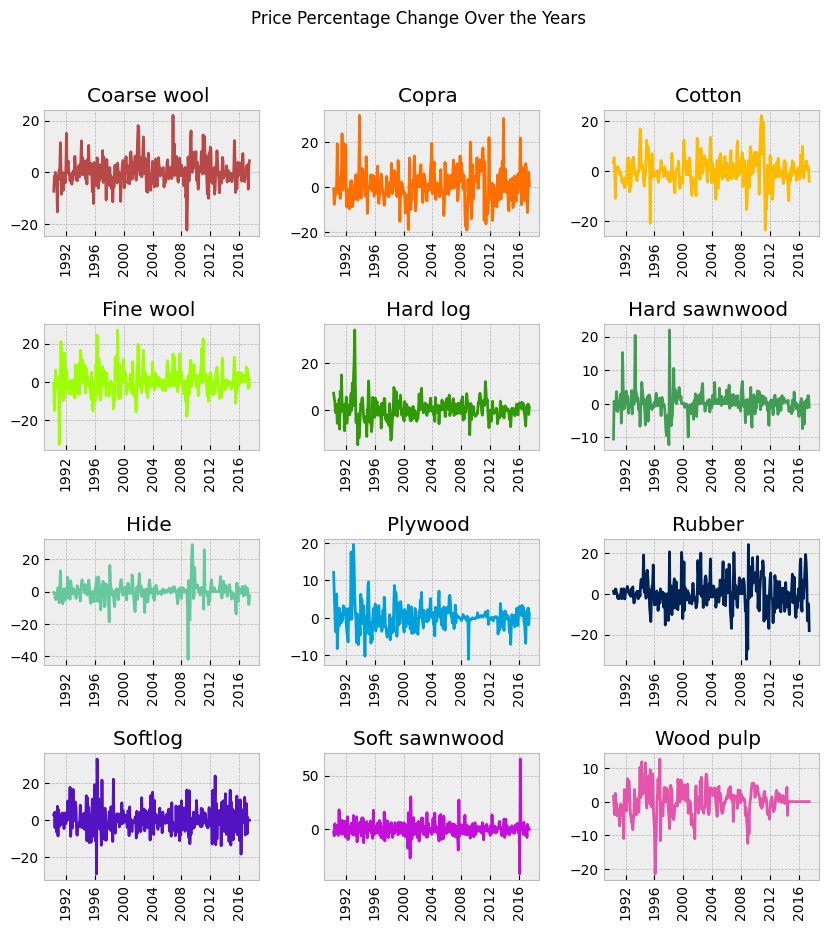

In [21]:
plt.figure(figsize=(10,10))

for i in range(len(raw_percentage)):
  plt.subplot(4,3, i+1)
  plt.subplots_adjust(hspace=0.7 ,wspace=0.3)
  plt.title(raw_percentage[i][:-14])
  plt.plot(df['Month'],df[raw_percentage[i]], color=colors[i])
  plt.xticks(rotation=90)
  #plt.ylabel('%')
plt.suptitle("Price Percentage Change Over the Years")

A partir destes gráficos podemos tirar algumas conclusões:
* Maior aumento percentual:**madeira serrada macia** (60%)
* Menor aumento percentual:** polpa de madeira** (< 20%)
* Maior descrescimo: **Couro** (~-40%)
* Menor descrescimo: **madeira compensada** (~ -10%) \\

Um potencial investidor pode usar estas informações para decidir em qual material investir levando em conta o comportamento de variação percentual dos preços.




In [41]:
#Valor exato das variações
max_p = min_p = diff_perc = 0
perc_max={}
perc_min={}

for i in raw_percentage:
  max_p=df[i].max()
  min_p=df[i].min()
  perc_max[i]= max_p
  perc_min[i]= min_p
  #raw_perc_max.append(max_p)
  #raw_perc_min.append(min_p)
print("Variações percentuais máximas: \n {} \n\n Variações percentuais mínimas: \n {} \n".format(perc_max,perc_min))


Variações percentuais máximas: 
 {'Coarse wool price % Change': 21.99, 'Copra price % Change': 31.82, 'Cotton price % Change': 22.22, 'Fine wool price % Change': 27.07, 'Hard log price % Change': 34.19, 'Hard sawnwood price % Change': 21.96, 'Hide price % change': 29.24, 'Plywood price % Change': 19.5, 'Rubber price % Change': 24.17, 'Softlog price % Change': 33.21, 'Soft sawnwood price % Change': 65.24, 'Wood pulp price % Change': 12.69} 

 Variações percentuais mínimas: 
 {'Coarse wool price % Change': -22.25, 'Copra price % Change': -19.17, 'Cotton price % Change': -23.64, 'Fine wool price % Change': -32.84, 'Hard log price % Change': -14.76, 'Hard sawnwood price % Change': -12.24, 'Hide price % change': -42.14, 'Plywood price % Change': -11.05, 'Rubber price % Change': -32.16, 'Softlog price % Change': -29.12, 'Soft sawnwood price % Change': -41.62, 'Wood pulp price % Change': -21.57} 



##Matriz de correlação
Verificando se há correlação entre os preços das matérias-primas. \\
Valores acima de $\pm$0.7 representam forte correlação.

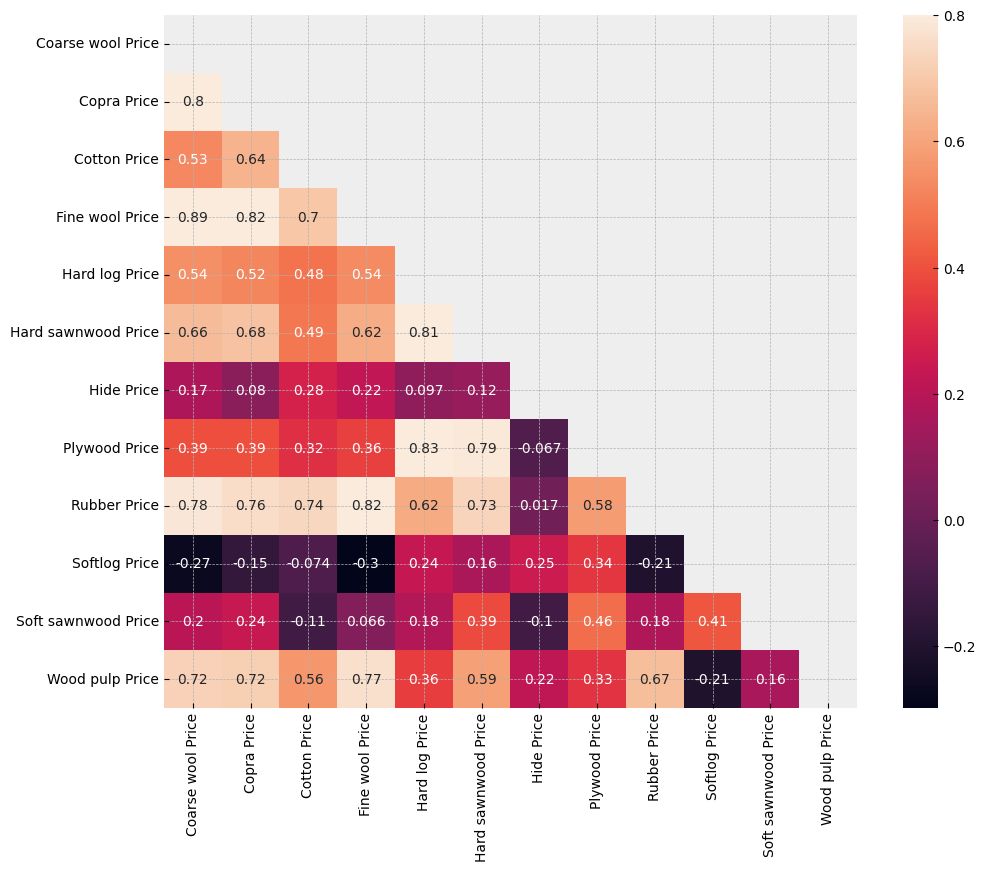

In [22]:
corrmat = df[raw_price].corr()
fig = plt.figure(figsize = (12, 9))

#Oculta a parte superior pois a matriz é simétrica
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

Através do mapa de correlação vemos que vários materiais estão correlacionados, contudo os que possuem a maior correlação são a lã fina e a lã grossa (0.86), o que está de acordo com o esperado pois ambas são extraídas da mesma fonte e são utilizadas para fins semelhantes. \\
Algo que chama atenção é forte correlação (> 0.8) entre a polpa de coco e às lãs fina e grossa. Não encontrei nenhuma informação que explique esta correlação, este seria um bom exercício para uma análise futura.

###Uma análise da relação entre os preços da lã fina e lã grossa

In [23]:
import plotly.graph_objs as go
import plotly.offline as pyoff

plot_wood=[go.Scatter(
            x=df['Month'],
            y=df['Coarse wool Price'], name='Coarse wool Price', marker=dict(color=mat_colors['Coarse wool Price'])),
           go.Scatter(
            x=df['Month'],
            y=df['Fine wool Price'], name= 'Fine wool Price', marker= dict(color=mat_colors['Fine wool Price']))
          ]
fig=go.Figure(data=plot_wood,
              layout=go.Layout(
                  title=dict(
                      text="Correlationed Raw-material"
                  ),
                  xaxis=dict(
                      title=dict(
                          text="Year"
                          )
                      ),
                  yaxis=dict(
                      title=dict(
                          text="Price ($)"
                          )
                      ),
        legend=dict(
            title=dict(
                text="Raw- Material"
                )
            ),
        font=dict(
            #family="Courier New, monospace",
            size=20,
            #color="RebeccaPurple",
            #variant="small-caps",
        )
    )
)
fig.show()



Observando o comportamento das duas matérias-primas podemos confirmar que os preços seguem a mesma tendência de aumento e decréscimo, corroborando com o que mostra o mapa de correlação.

#Regressão Linear

Implementando um algoritmo de regressão linear

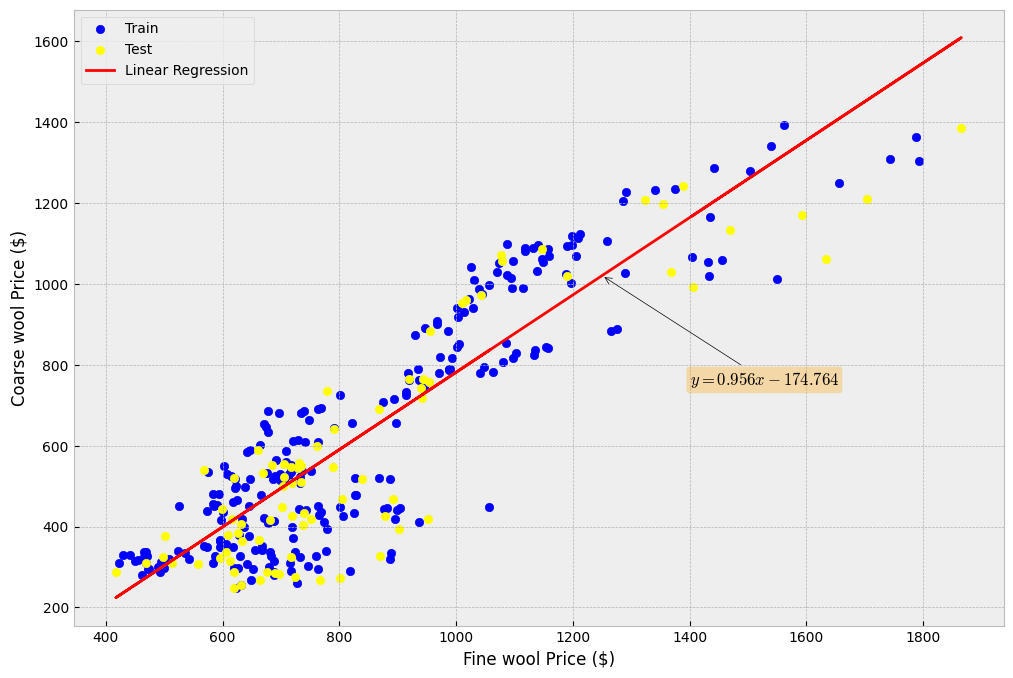

In [103]:
#importando as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#separando o dataset em conjunto de treino e conjunto de teste
x = df[["Fine wool Price"]] # reshape na variavel preditora pois X precisa ser um array 2D
y= df['Coarse wool Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model = LinearRegression() #criando o modelo de regressão linear
res=model.fit(x_train, y_train) #treinando
y_pred = model.predict(x_test) #previsão dos dados com o modelo já treinado

#coeficientes
a=res.coef_
b=res.intercept_

#plot dos resultados
plt.figure(figsize=(12,8))

plt.scatter(x_train, y_train, color='blue', label="Train")
plt.scatter(x_test,y_test, color='yellow', label="Test")
plt.plot(x, model.predict(x), color='red', label="Linear Regression")
plt.annotate("$y={:.3f} x {:.3f}$".format(a[0],b),
             xy=(1250,a*1250+b),  #Ponto alvo da anotação
             xytext=(1400,750 ),  #Posição do texto
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.2', fc='orange', alpha=0.3),
             arrowprops=dict(arrowstyle='->', color='black')
)
#plt.scatter(x,y, color='orange', label= "Real", alpha=0.5)
#plt.title('Linear Regression')
plt.xlabel('Fine wool Price ($)')
plt.ylabel('Coarse wool Price ($)')
plt.legend()
plt.show()



In [43]:
#Avaliação do modelo
r2_score = model.score(x_test, y_test)
print(f"Coeficiente de determinação (R²): {r2_score}")

#Erros do modelo
y_pred = model.predict(x_test)
#Mean Absolute Error: a média do valor absoluto dos erros
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#Erro Quadrático Médio: média dos erros quadráticos
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
#Erro médio quadrático da raiz: raiz quadrada da média dos erros quadráticos
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Coeficiente de determinação (R²): 0.7699863406402837
MAE: 114.36790800168451
MSE: 20626.168701879764
RMSE: 143.6181350034868


* O coeficiente de determinação (R²) nos ajuda a entender o quão bem o nosso modelo se ajusta aos dados.
O valor de R² igual a 0.76 indica que aproximadamente 76% da variabilidade dos preços da lã grossa podem ser explicados pelos preços da lã fina. \\
Levando em consideração que não fizemos nenhuma alteração nos parâmetros dos dados este é um bom resultado.
* Erro médio absoluto (MAE): 114.37 representa a média das diferenças absolutas entre as previsões e os valores reais. Ou seja, é um representação do quanto se está errando.
* Erro quadrático médio (MSE): 20626.17 representa a média dos erros ao quadrado entre as previsões e os valores reais. É um valor sensível a outliers e quanto menor o valor do MSE, melhor é o desempenho do modelo em minimizar a magnitude dos erros.
* Raiz quadrada do erro quadrático médio (RMSE): 143.62 O RMSE é a raiz quadrada do MSE e representa uma medida de erro médio semelhante ao desvio padrão. Quanto menor o valor do RMSE, melhor é o desempenho do modelo em fazer previsões mais próximas dos valores reais.

